# Linear Regression and Regularization

## Own Implementation of Linear Regression and Batch Gradient Descent


 1st train validation split



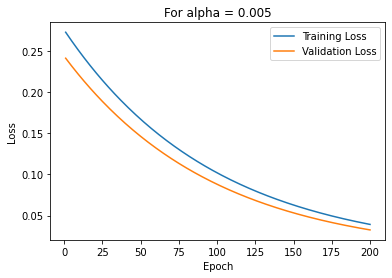

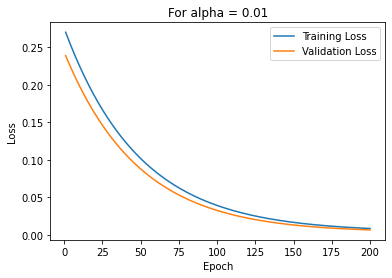

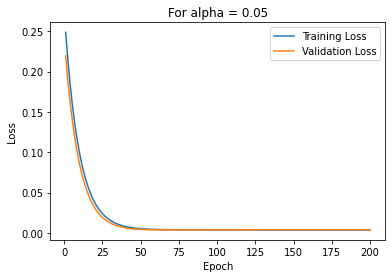

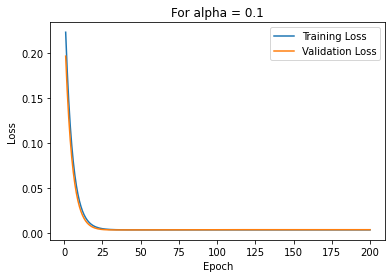


 2nd train validation split



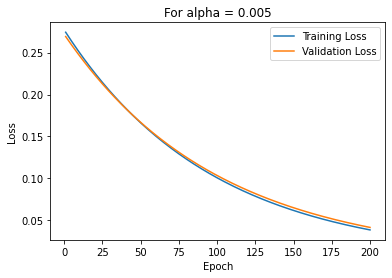

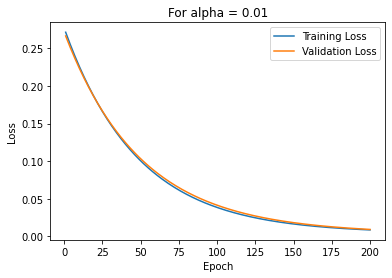

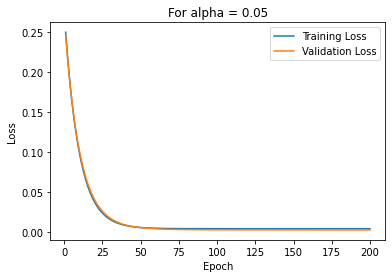

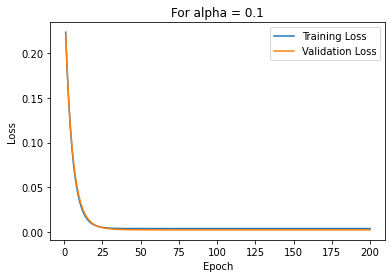


 3rd train validation split



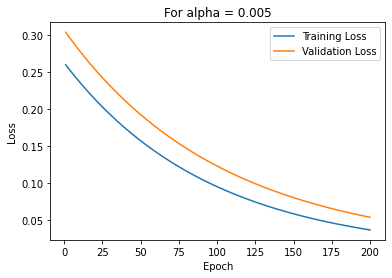

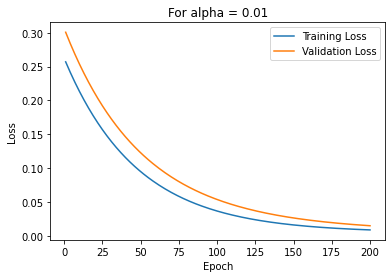

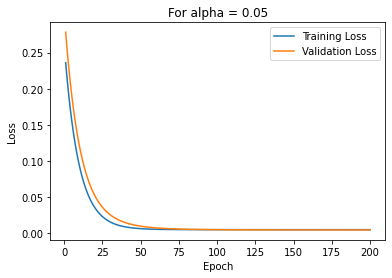

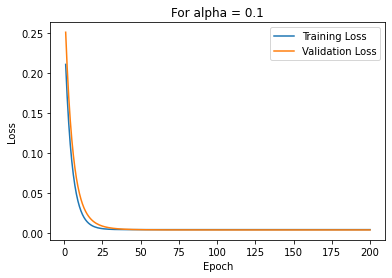


 4th train validation split



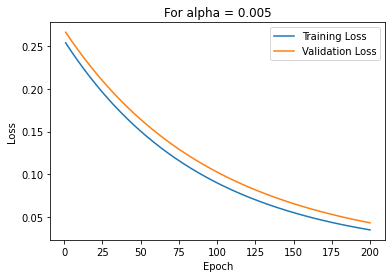

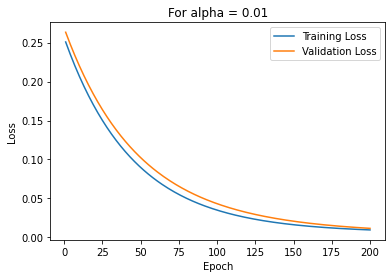

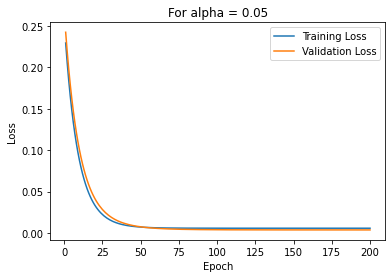

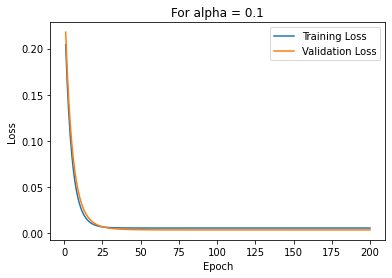


 5th train validation split



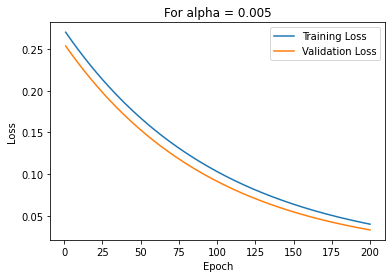

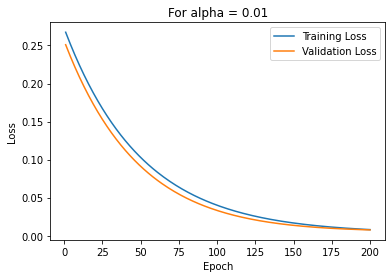

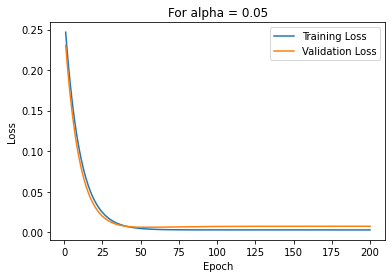

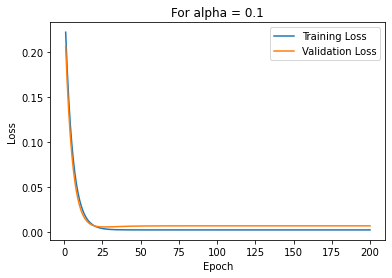

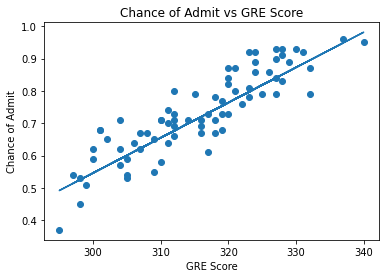

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

def Predict(theta, x):
  return (theta[0] + (theta[1]*x))

def MSE (x, y_actual, theta):
  sum = 0
  for i in range(len(x)):
    sum += ((Predict(theta, x[i]) - y_actual[i]) ** 2)

  return (sum/(2*len(x)))


def BGD(alpha, x, y_actual, x_test, y_test, epoch):
  theta = [0,0]
  mse_training = []
  mse_test = []

  for e in range(epoch):
    update_theta0 = 0
    update_theta1 = 0

    for i in range(len(x)):
      update_theta0 += ( Predict(theta, x[i]) - y_actual[i]) #this sums to n the partial derivative with repsect to theta0 
      update_theta1 += (( Predict(theta, x[i]) - y_actual[i]) * x[i]) #this sums to n the partial derivative with respect to theta1
    

    theta[0] = theta[0] - ( (alpha * update_theta0) / len(x)) #this updates the value of theta0
    theta[1] = theta[1] - ( (alpha * update_theta1) / len(x)) #this updates the value of theta1
    mse_training.append(MSE(x, y_actual, theta))
    mse_test.append(MSE(x_test, y_test, theta))

  return theta, mse_training, mse_test
     

def Normalize(data):
  m = data.mean()
  s = data.std()
  data = (data-m)/s

  return data

def Running(alpha, x_t, y_t, x_v, y_v): #this is used to run the BGD and plot the results for that specific training and validation set
  
  for a in alpha: #for all alpha values for t
    theta, mse_training, mse_test = BGD(a, x_t, y_t, x_v, y_v, 200)
    plt.plot(np.arange(1,201), mse_training, label = 'Training Loss')
    plt.plot(np.arange(1,201), mse_test, label = 'Validation Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    st = 'For alpha = ' + str(a)
    plt.title(st)
    plt.legend()
    plt.show()  


df_training = pd.read_csv('training_set.csv')
df_test = pd.read_csv('test_set.csv')
x_training_read = df_training['GRE Score']
y_training = df_training['Chance of Admit']
x_test_read = df_test['GRE Score']
y_test = df_test['Chance of Admit']

x_training = Normalize(x_training_read.iloc[0:len(x_training_read)]+1)
x_test = Normalize(x_test_read.iloc[0:len(x_test_read)]+1)

alpha = [0.005, 0.01, 0.05, 0.1]
#Now I will divide the data into train validation splits for 5-fold validation and run BGD for different alphas

x_t = x_training.iloc[0: 4* int(len(x_training)/5) ] #take the first 4 as training and the last as validation
x_v = x_training.iloc[4* int(len(x_training)/5): len(x_training)].to_numpy()
y_t = y_training.iloc[0: 4* int(len(y_training)/5) ]
y_v = y_training.iloc[4* int(len(y_training)/5): len(y_training)].to_numpy() 
print("\n 1st train validation split\n")
Running(alpha, x_t, y_t, x_v, y_v)

x_t = x_training.iloc[0: 3* int(len(x_training)/5)]
x_t.append(x_training.iloc[4* int(len(x_training)/5): len(x_training)]) #take the first 3 and the 5th as training and the 4th as validation
x_v = x_training.iloc[3* int(len(x_training)/5): 4* int(len(x_training)/5)].to_numpy()
y_t = y_training.iloc[0: 3* int(len(y_training)/5)]
y_t.append(y_training.iloc[4* int(len(y_training)/5): len(y_training)])
y_v = y_training.iloc[3* int(len(y_training)/5): 4* int(len(y_training)/5)].to_numpy() 
print("\n 2nd train validation split\n")
Running(alpha, x_t, y_t, x_v, y_v)

x_t = x_training.iloc[0: 2* int(len(x_training)/5)] #take the first 2 and the last 2 as training and the third as validation
x_t.append(x_training.iloc[3* int(len(x_training)/5): len(x_training)])
x_v = x_training.iloc[2* int(len(x_training)/5): 3* int(len(x_training)/5)].to_numpy()
y_t = y_training.iloc[0: 2* int(len(y_training)/5)]
y_t.append(y_training.iloc[3* int(len(y_training)/5): len(y_training)])
y_v = y_training.iloc[2* int(len(y_training)/5): 3* int(len(y_training)/5)].to_numpy() 
print("\n 3rd train validation split\n")
Running(alpha, x_t, y_t, x_v, y_v)

x_t = x_training.iloc[0: 1* int(len(x_training)/5)] #Take the first and the last 3 as training and the second as validation
x_t.append(x_training.iloc[2* int(len(x_training)/5): len(x_training)])
x_v = x_training.iloc[1* int(len(x_training)/5): 2* int(len(x_training)/5)].to_numpy()
y_t = y_training.iloc[0: 1* int(len(y_training)/5)]
y_t.append(y_training.iloc[2* int(len(y_training)/5): len(y_training)])
y_v = y_training.iloc[1* int(len(y_training)/5): 2* int(len(y_training)/5)].to_numpy() 
print("\n 4th train validation split\n")
Running(alpha, x_t, y_t, x_v, y_v)

x_t = x_training.iloc[1*int(len(x_training)/5): len(x_training) ].to_numpy() #Take the last 4 as training and the first as validation
x_v = x_training.iloc[0: 1*int(len(x_training)/5)]
y_t = y_training.iloc[1*int(len(y_training)/5): len(y_training)].to_numpy()
y_v = y_training.iloc[0: 1*int(len(y_training)/5)]
print("\n 5th train validation split\n")
Running(alpha, x_t, y_t, x_v, y_v)

#Looking at the graphs, we can see that optimal value of alpha is 0.05, The loss also reaches its lowest point at alpha = 0.1 but it is preferable 
#to take smaller values of alpha
#Secondly, the optimal number of epochs are 100. The mse converges for values lower than that also but to be on the safer side we will choose a 100 epochs

x_temp = x_training.iloc[0: len(x_training)]
x_temp_test = x_test.iloc[0:len(x_test)]
theta, mse_training, mse_test = BGD(0.05, x_temp, y_training, x_temp_test, y_test, 100) #now run BGD for train data and calculate mse for training data and test data

y = []
for i in x_test:
  y.append(Predict(theta, i))

plt.figure()
plt.scatter(x_test_read, y_test)
plt.plot(x_test_read, y)
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('Chance of Admit vs GRE Score')
plt.show()


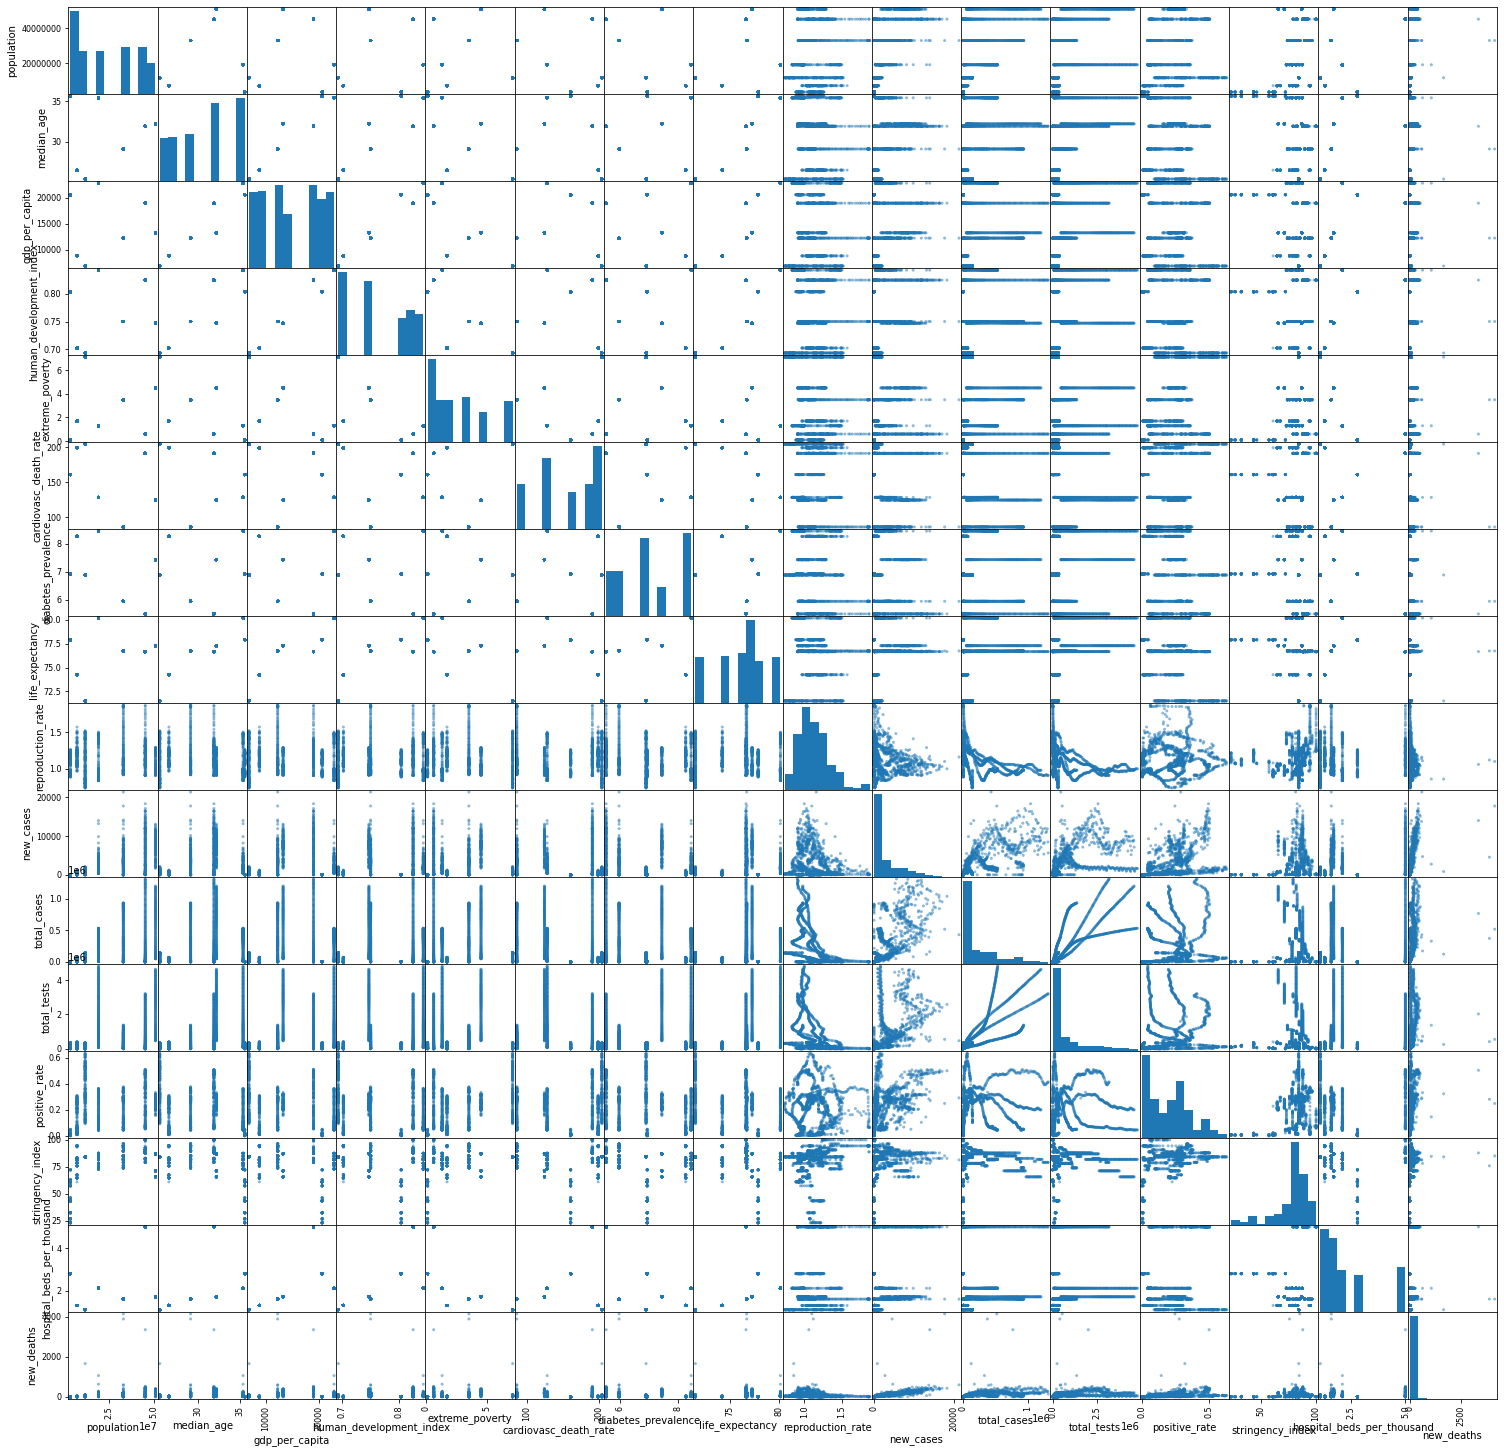

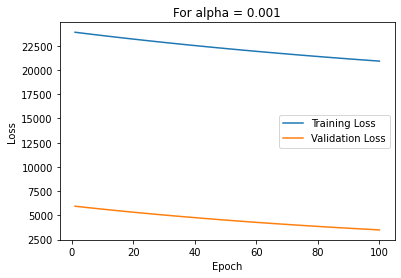

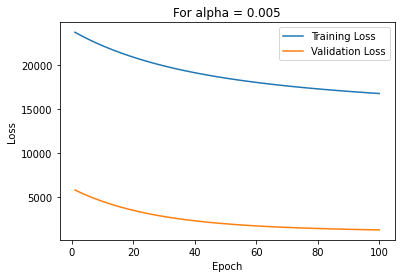

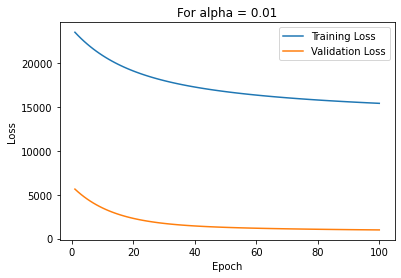

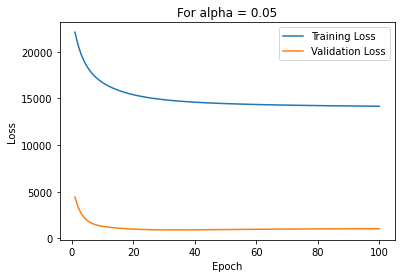

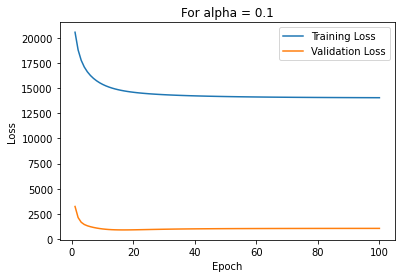

In [84]:

def Correlation(data, new_deaths, title): #calculate the pearson correlation coefficient
  data_temp = pd.concat([data, new_deaths], axis=1)
  r_data = data_temp.cov()['new_deaths'][0] / (data.std() * new_deaths.std())
  return abs(r_data)


def Normalize_Data(Data, columns):
  for x in columns:
    m = Data[x].mean()
    s = Data[x].std()
    Data[x] = (Data[x]-m) / s 

  return Data


def Predict_Data(theta, x):
  sum = theta[0]
  for i in range(len(x)):
    sum += (theta[i+1] * x[i])
  return sum


def MSE_Data(x, y, theta):
  sum = 0
  for i in range(x.shape[0]):
    sum += (( Predict_Data(theta, x.iloc[i]) - y[i] ) ** 2)

  return (sum / (2*(x.shape[0])))


def BGD_Data(alpha, x, y, x_v, y_v, epoch):
  theta = np.zeros(11)
  mse_training = []
  mse_validation = []

  for e in range(epoch):
    update_theta = np.zeros(11)

    for i in range(x.shape[0]):
      update_theta[0] += ( Predict_Data(theta, x.iloc[i]) - y[i]) #sum to n of partial derivative with respect to theta0
      for j in range(1,11):
        update_theta[j] += (( Predict_Data(theta, x.iloc[i]) - y[i]) * x.iloc[i, j-1]) #sum to n of partial derivative with respect to all other thetas

    for i in range(11):
      theta[i] = theta[i] - ( (alpha * update_theta[i])/ x.shape[0])

    mse_training.append(MSE_Data(x,y,theta))
    mse_validation.append(MSE_Data(x_v, y_v, theta))
    
  return theta, mse_training, mse_validation




df_training = pd.read_csv('part2_training_set.csv') #files are named from training_set to part2_training_set due to clash in file names
df_validation = pd.read_csv('part2_validation_set.csv')
df_test = pd.read_csv('part2_test_set.csv')
corr = {}


pd.plotting.scatter_matrix(df_training, figsize = (25.6,25.6)) #to plot a scatter matrix


for x in df_training.columns:
  if (x=='date' or x=='location' or x =='new_deaths'):continue
  corr[x] = Correlation(df_training[x], df_training['new_deaths'], x)


corr = {k: v for k, v in sorted(corr.items(), key=lambda item: item[1])} #sorting the dictionary

i = 0
df_columns = []
for x in corr: #to remove all instances of the smallest 5 correlated data columns
  if(i<5):
    del df_training[x]
    del df_validation[x]
    del df_test[x]
  else:
    df_columns.append(x)
  i+=1


df_training_normalized = Normalize_Data(df_training, df_columns)
df_validation_normalized = Normalize_Data(df_validation, df_columns)
df_test_normalized = Normalize_Data(df_test, df_columns)


x_values_training = df_training_normalized.drop(['new_deaths', 'date', 'location'], axis = 1)
x_values_validation = df_validation_normalized.drop(['new_deaths', 'date', 'location'], axis = 1)
x_values_test = df_test_normalized.drop(['new_deaths', 'date', 'location'], axis = 1)

alpha = [0.001, 0.005, 0.01, 0.05, 0.1]
for a in alpha:
  theta, mse_training, mse_validation = BGD_Data(a, x_values_training, df_training['new_deaths'], x_values_validation, df_validation['new_deaths'], 100)
  plt.figure()
  plt.plot(np.arange(1,101), mse_training, label = 'Training Loss')
  plt.plot(np.arange(1, 101), mse_validation, label = 'Validation Loss')
  plt.legend()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  s = 'For alpha = '+ str(a)
  plt.title(s)
  plt.legend()
  plt.show()


#Looking at the graphs, we can see that optimal value of alpha is 0.1, The loss also reaches its lowest point at alpha = 0.05 but it converges for a higher number of epochs at that alpha
#Secondly, the optimal number of epochs are 60. The mse converges for values lower than that also but to be on the safer side we will choose 60 epochs


## Sklearn Implementation 

For Lasso alpha = 1 , MSE = 2096.5229336759653
For Ridge alpha = 1 , MSE = 2121.5613249094436
For Elastic alpha = 1 , MSE = 1371.9515882256499 

For Lasso alpha = 2 , MSE = 2050.042283716537
For Ridge alpha = 2 , MSE = 2116.479036455361
For Elastic alpha = 2 , MSE = 1238.9533927424347 

For Lasso alpha = 10 , MSE = 1538.0670790376748
For Ridge alpha = 10 , MSE = 2079.8303508415606
For Elastic alpha = 10 , MSE = 2735.5196051868447 

For Lasso alpha = 20 , MSE = 1229.0036954943628
For Ridge alpha = 20 , MSE = 2041.8961264660563
For Elastic alpha = 20 , MSE = 4331.143590787624 

For Lasso alpha = 30 , MSE = 1119.049633188841
For Ridge alpha = 30 , MSE = 2010.189965687569
For Elastic alpha = 30 , MSE = 5262.1799600951035 

For Lasso alpha = 40 , MSE = 1208.204892121109
For Ridge alpha = 40 , MSE = 1982.9378074847411
For Elastic alpha = 40 , MSE = 5847.392854166107 

For Lasso alpha = 50 , MSE = 1496.4694722911674
For Ridge alpha = 50 , MSE = 1958.9689370927285
For Elastic alpha = 50 , MSE 

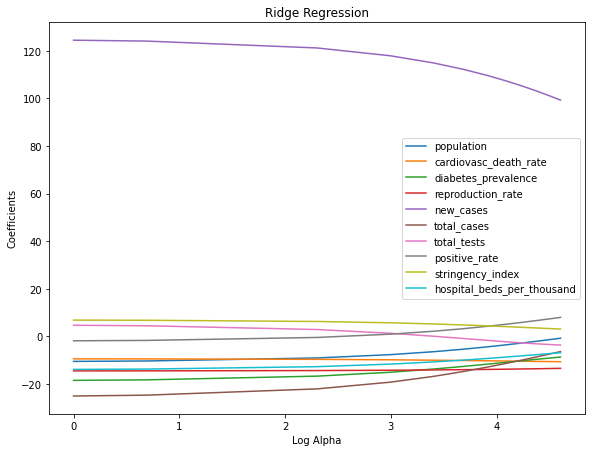

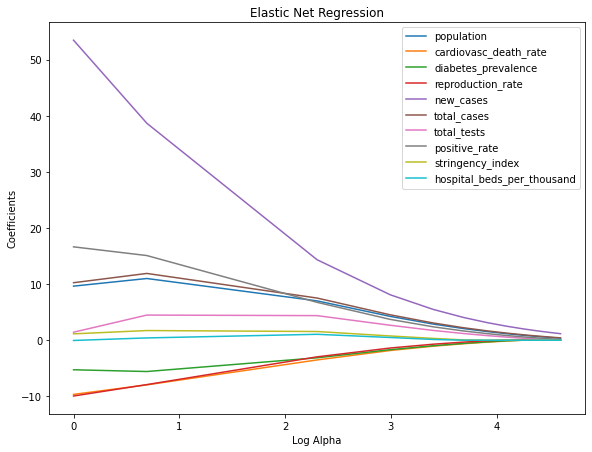


Test Data:
For Linear Regression, MSE = 2019.8821027851902
For Lasso Regression, MSE = 1335.981170979821
For Ridge Regression, MSE = 1565.0038274729366
For Elastic Net Regression, MSE = 1497.8613762576306


In [88]:
from sklearn import linear_model
from sklearn import metrics


alpha = [1, 2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
ridge_coefs = []
elastic_coefs = []

for a in alpha:
  reg_lasso = linear_model.Lasso(alpha=a).fit(x_values_training.to_numpy(), df_training['new_deaths'].to_numpy()) #this is used to fit a model and find the values of the coefficients
  mse = metrics.mean_squared_error( df_validation['new_deaths'].to_numpy(), reg_lasso.predict(x_values_validation.to_numpy() )) #this will find the mean squared error
  print("For Lasso alpha =", a, ", MSE =", mse)

  reg_ridge = linear_model.Ridge(alpha=a).fit(x_values_training.to_numpy(), df_training['new_deaths'].to_numpy()) #same for ridge
  mse = metrics.mean_squared_error( df_validation['new_deaths'].to_numpy(), reg_ridge.predict(x_values_validation.to_numpy() ))
  print("For Ridge alpha =", a, ", MSE =", mse)
  ridge_coefs.append(reg_ridge.coef_)

  reg_elastic = linear_model.ElasticNet(alpha = a).fit(x_values_training.to_numpy(), df_training['new_deaths'].to_numpy()) #same for elastic net
  mse = metrics.mean_squared_error( df_validation['new_deaths'].to_numpy(), reg_elastic.predict(x_values_validation.to_numpy() ))
  print("For Elastic alpha =", a, ", MSE =", mse,"\n")
  elastic_coefs.append(reg_elastic.coef_)

ridge_alpha = [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000] #to find the optimal value of alpha for ridge regression
print()
for a in ridge_alpha:
  reg_ridge = linear_model.Ridge(alpha=a).fit(x_values_training.to_numpy(), df_training['new_deaths'].to_numpy()) #to see the error of the optimal value of ridge
  mse = metrics.mean_squared_error( df_validation['new_deaths'].to_numpy(), reg_ridge.predict(x_values_validation.to_numpy() ))
  print("For Ridge alpha =", a, ", MSE =", mse)
print("\n")

ridge_coefs_new = np.array(ridge_coefs) #to convert coefficient list into array for easier data slicing
elastic_coefs_new = np.array(elastic_coefs)

alpha_new = []
for i in range(len(alpha)):
  alpha_new.append( math.log(alpha[i] )) #to take the log of alpha values to be able to view the graph better
plt.figure(figsize = [9.6,7.2])
for i in range(10):
  plt.plot(alpha_new, ridge_coefs_new[:,i], label = list(x_values_training.columns)[i]) #plot for each coefficient values 
plt.xlabel('Log Alpha')
plt.ylabel('Coefficients')
plt.legend()
plt.title('Ridge Regression')
plt.show()

plt.figure(figsize=[9.6, 7.2])
for i in range(10):
  plt.plot(alpha_new, elastic_coefs_new[:,i], label = list(x_values_training.columns)[i])
plt.xlabel('Log Alpha')
plt.ylabel('Coefficients')
plt.legend()
plt.title('Elastic Net Regression')
plt.show()

  
#As can be seen by the values obtained
#The best alpha for Lasso regression is approximately 30
#The best alpha for Ridge regression is approximately 1700
#The best alpha for Elastic Net regression is approximately 2

print("\nTest Data:")

reg_lr = linear_model.LinearRegression().fit(x_values_training.to_numpy(), df_training['new_deaths'].to_numpy())
mse = metrics.mean_squared_error( df_test['new_deaths'].to_numpy(), reg_lr.predict(x_values_test.to_numpy() ))
print("For Linear Regression, MSE =", mse)

reg_lasso = linear_model.Lasso(alpha=30).fit(x_values_training.to_numpy(), df_training['new_deaths'].to_numpy())
mse = metrics.mean_squared_error( df_test['new_deaths'].to_numpy(), reg_lasso.predict(x_values_test.to_numpy() ))
print("For Lasso Regression, MSE =", mse)

reg_ridge = linear_model.Ridge(alpha=1700).fit(x_values_training.to_numpy(), df_training['new_deaths'].to_numpy())
mse = metrics.mean_squared_error( df_test['new_deaths'].to_numpy(), reg_ridge.predict(x_values_test.to_numpy() ))
print("For Ridge Regression, MSE =", mse)
ridge_coefs.append(reg_ridge.coef_)

reg_elastic = linear_model.ElasticNet(alpha = 2).fit(x_values_training.to_numpy(), df_training['new_deaths'].to_numpy())
mse = metrics.mean_squared_error( df_test['new_deaths'].to_numpy(), reg_elastic.predict(x_values_test.to_numpy() ))
print("For Elastic Net Regression, MSE =", mse)
elastic_coefs.append(reg_elastic.coef_)
